<a href="https://colab.research.google.com/github/rosie0520486/superstore/blob/main/zomato0615_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

＃データ前処理

<ipython-input-4-ce67357c1bd7>:10: DtypeWarning: Columns (6,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272

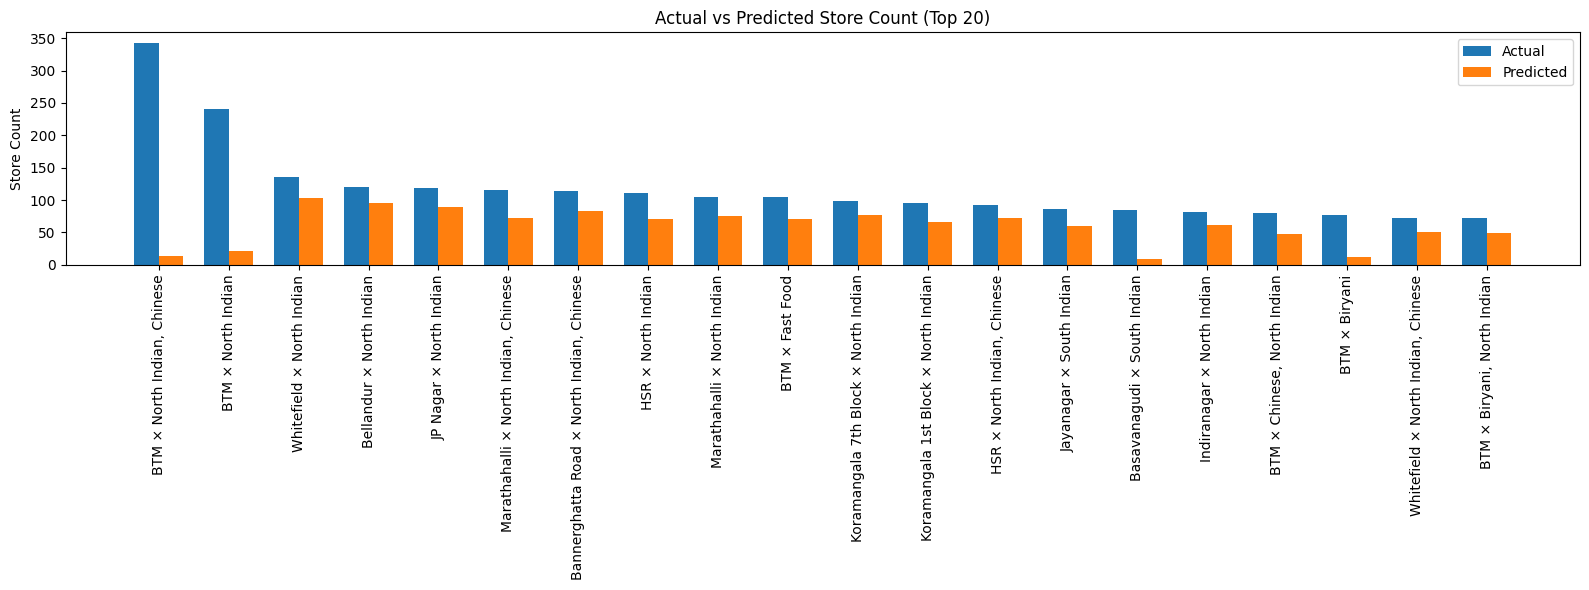

<ipython-input-4-ce67357c1bd7>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics, x='Metric', y='Value', palette='pastel')


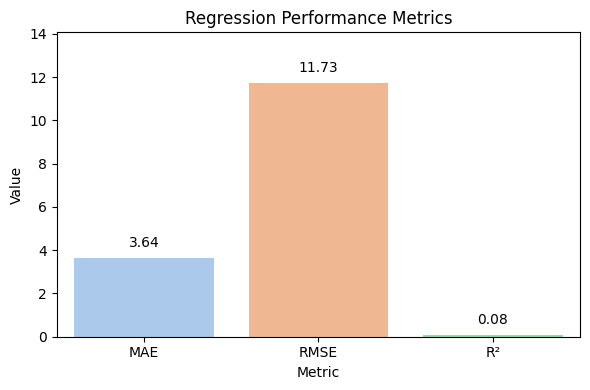

,location,cuisines,store_count,predicted_store_count,gap
199,BTM,"North Indian, Chinese",342,12.90,329.10
185,BTM,North Indian,241,21.63,219.37
812,Basavanagudi,South Indian,84,9.33,74.67
44,BTM,Biryani,77,12.28,64.72
272,BTM,"South Indian, North Indian, Chinese",67,6.47,60.53
996,Bellandur,"North Indian, Chinese",72,17.18,54.82
4715,Marathahalli,"North Indian, Chinese",116,73.01,42.99
4507,Malleshwaram,South Indian,54,11.54,42.46
3767,Koramangala 5th Block,"Cafe, Continental, Beverages",52,10.34,41.66
2163,HSR,North Indian,111,71.33,39.67


,location,cuisines,store_count,predicted_store_count,gap
1580,Ejipura,South Indian,8,26.57,-18.57
5458,Sadashiv Nagar,South Indian,4,24.41,-20.41
6023,"Varthur Main Road, Whitefield",North Indian,3,23.42,-20.42
1322,CV Raman Nagar,South Indian,2,24.02,-22.02
5027,New BEL Road,South Indian,12,36.69,-24.69
2310,Hosur Road,North Indian,8,36.48,-28.48
3070,Jayanagar,North Indian,25,56.37,-31.37
4479,Malleshwaram,North Indian,16,55.24,-39.24
5454,Sadashiv Nagar,North Indian,5,47.40,-42.40
5527,Sankey Road,North Indian,3,45.56,-42.56


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1
file_path = '/content/drive/MyDrive/zomato.csv'
df = pd.read_csv(file_path, encoding='latin1')

# 2
df = df[['location', 'cuisines', 'rate', 'votes', 'approx_cost(for two people)']].copy()
df['rate'] = df['rate'].replace('NEW', np.nan)
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)').astype(float)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['approx_cost'] = pd.to_numeric(df['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')
df = df.dropna()

# 3
grouped = df.groupby(['location', 'cuisines']).agg({
    'rate': 'mean',
    'votes': 'mean',
    'approx_cost': 'mean',
    'location': 'count'
}).rename(columns={'location': 'store_count'}).reset_index()

# 4
X = pd.get_dummies(grouped[['location', 'cuisines', 'rate', 'votes', 'approx_cost']], drop_first=True)
y = grouped['store_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 5
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6
grouped['predicted_store_count'] = model.predict(X)
grouped['gap'] = grouped['store_count'] - grouped['predicted_store_count']

# 7
top_n = 20
sorted_grouped = grouped.sort_values(by='store_count', ascending=False).head(top_n)
x_labels = sorted_grouped['location'] + ' × ' + sorted_grouped['cuisines']
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(16, 6))
plt.bar(x - width/2, sorted_grouped['store_count'], width, label='Actual')
plt.bar(x + width/2, sorted_grouped['predicted_store_count'], width, label='Predicted')
plt.xticks(x, x_labels, rotation=90)
plt.ylabel('Store Count')
plt.title('Actual vs Predicted Store Count (Top 20)')
plt.legend()
plt.tight_layout()
plt.show()

# 8
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

metrics = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Value': [mae, rmse, r2]
})
plt.figure(figsize=(6, 4))
sns.barplot(data=metrics, x='Metric', y='Value', palette='pastel')
plt.title('Regression Performance Metrics')
plt.ylim(0, max(metrics['Value']) * 1.2)
for i, v in enumerate(metrics['Value']):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center')
plt.tight_layout()
plt.show()

# 9
gap_sorted = grouped[['location', 'cuisines', 'store_count', 'predicted_store_count', 'gap']].sort_values(by='gap', ascending=False)
display(gap_sorted.head(10))
display(gap_sorted.tail(10))

In [ ]:
from google.colab import files

#
uploaded = files.upload()


Mounted at /content/drive


<ipython-input-1-1941922018>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
<ipython-input-1-1941922018>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df['rate'].astype(float)


       location  rate  approx_cost(for two people)
0  Banashankari   4.1                        800.0
1  Banashankari   4.1                        800.0
2  Banashankari   3.8                        800.0
3  Banashankari   3.7                        300.0
4  Basavanagudi   3.8                        600.0


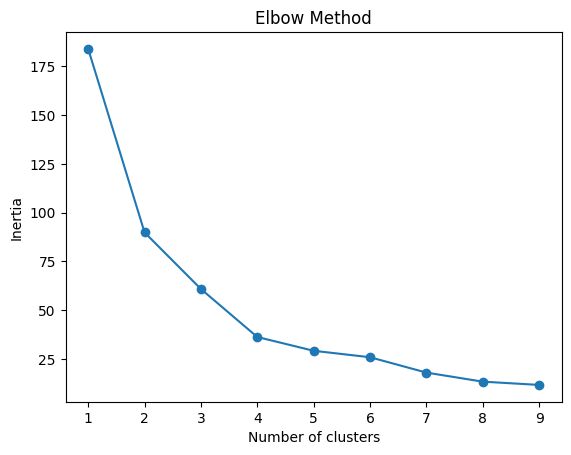

           mean_cost  mean_rate
cluster                        
0         920.755100   3.893856
1         416.362326   3.469186
2         529.777531   3.682517
3        2582.692308   3.965385
                              mean_cost  mean_rate
location                                          
Basavanagudi                2200.000000   3.700000
Sankey Road                 1925.000000   3.810000
Richmond Road               1899.431818   4.031818
Residency Road              1840.566038   4.058491
Seshadripuram               1816.666667   3.950000
Ulsoor                      1775.000000   4.042647
Vasanth Nagar               1766.666667   4.016667
Koramangala 3rd Block       1750.000000   4.100000
Old Airport Road            1747.368421   4.121053
MG Road                     1706.572770   4.143662
Rajajinagar                 1700.000000   4.123077
Whitefield                  1654.371585   4.103279
Koramangala 6th Block       1635.365854   3.902439
Brigade Road                1631.351351   3

<ipython-input-1-1941922018>:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='mean_cost', data=sorted_df, palette='YlOrRd')


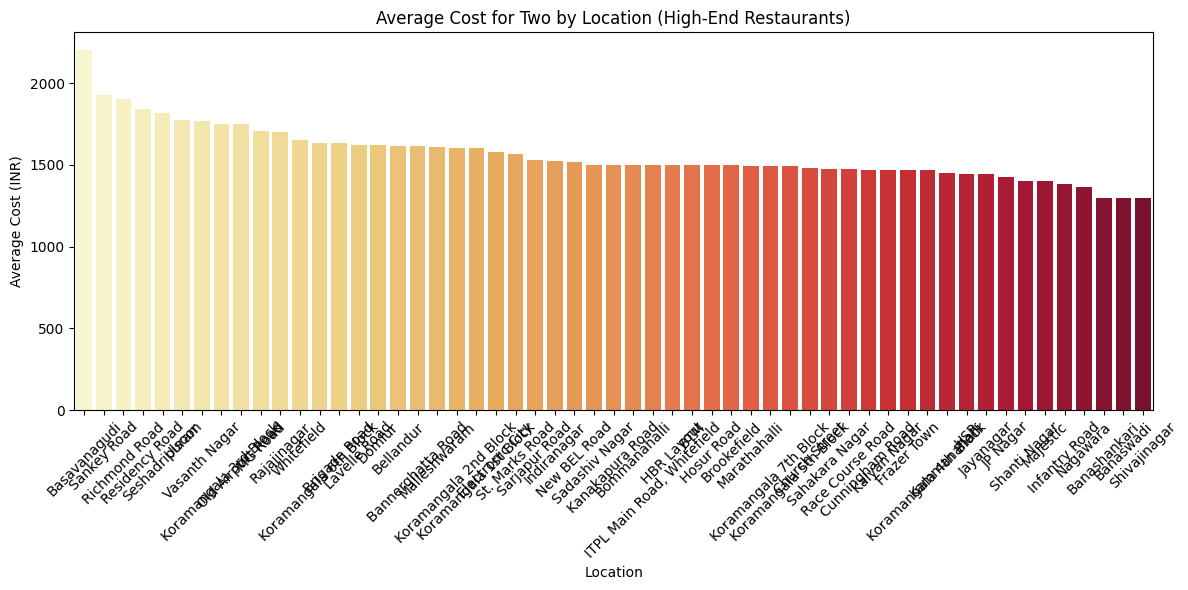

<ipython-input-1-1941922018>:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='mean_rate', data=sorted_df, palette='cool')


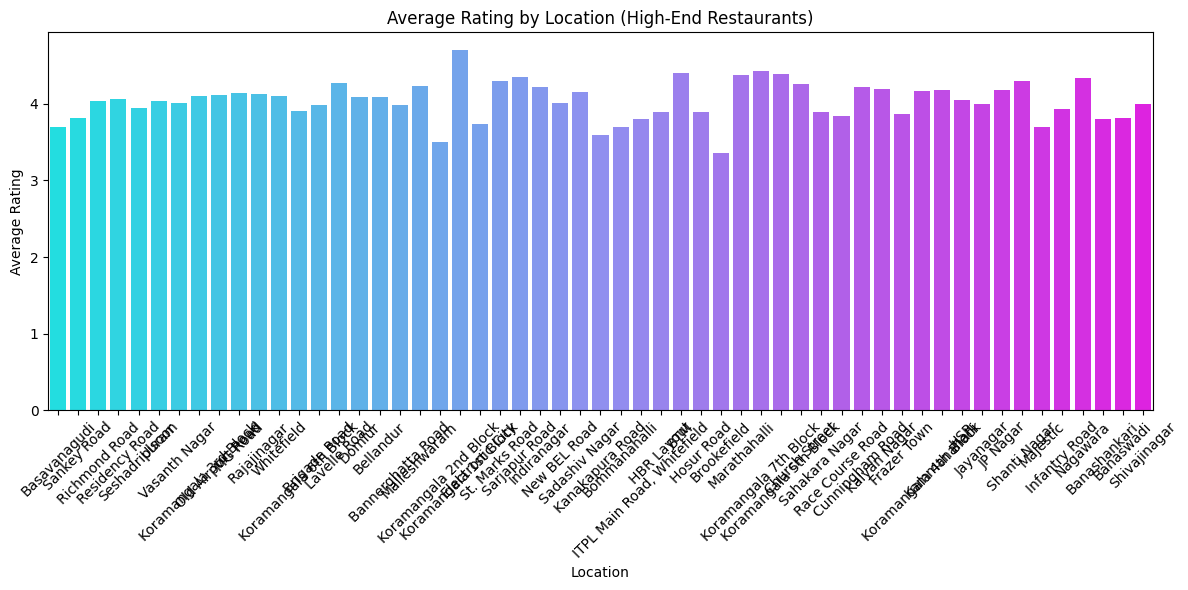

<ipython-input-1-1941922018>:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


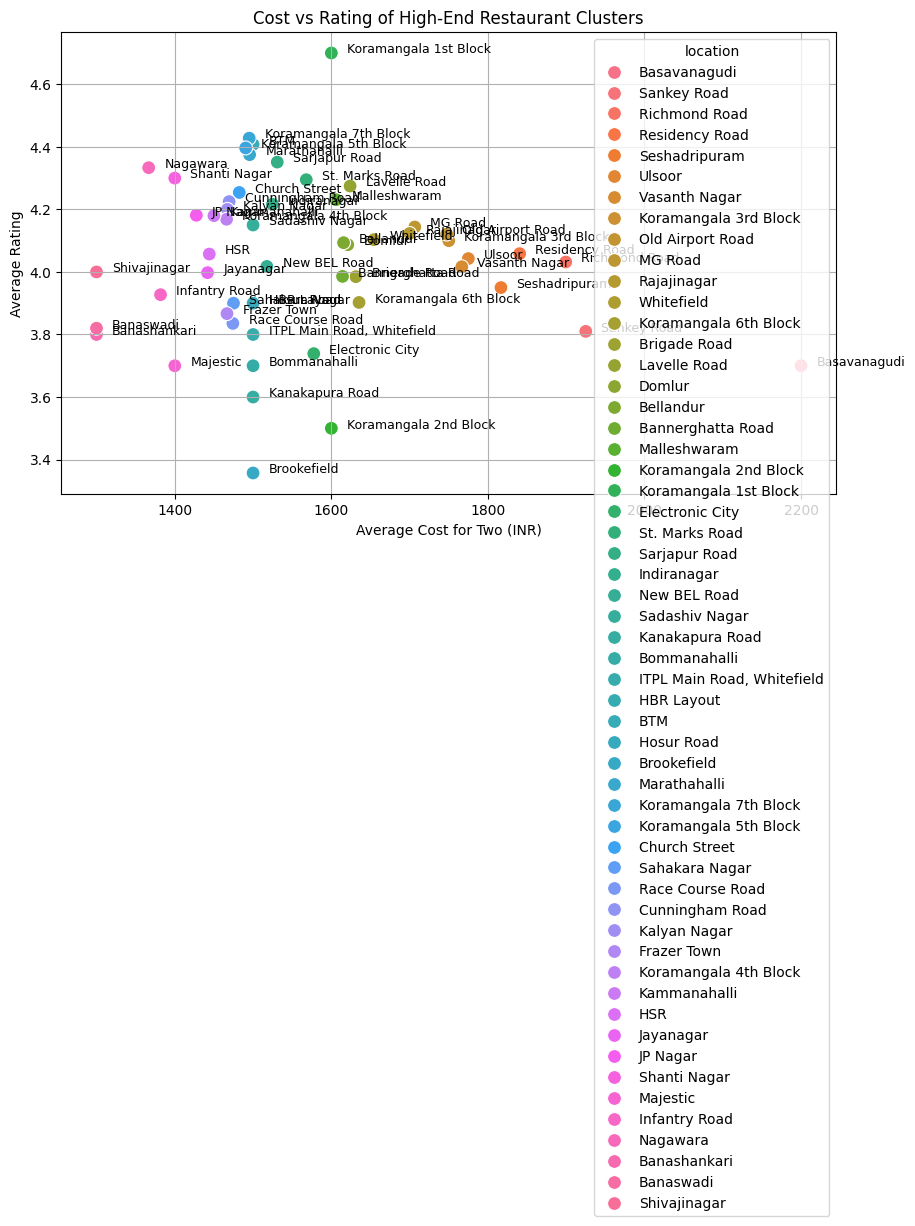

Index(['location', 'rate', 'approx_cost(for two people)', 'cluster'], dtype='object')

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1.
from google.colab import drive
drive.mount('/content/drive')

# 2.
file_path = '/content/drive/My Drive/zomato.csv'  # ← 경로에 맞게 수정
df = pd.read_csv(file_path, encoding='latin1', low_memory=False)

# 1.
df = df[['location', 'rate', 'approx_cost(for two people)']].copy()

# 2.
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '').str.strip()

# 3.
df = df[df['approx_cost(for two people)'].str.match(r'^\d+(\.\d+)?$')]

# 4.
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

# 5.
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)')
df = df.dropna(subset=['rate'])  # 평점 없는 행 제거
df['rate'] = df['rate'].astype(float)

#
print(df.head())


# 4.
df = df.dropna()


# 6.
grouped = df.groupby('location').agg({
    'approx_cost(for two people)': 'mean',
    'rate': 'mean'
}).reset_index().rename(columns={
    'approx_cost(for two people)': 'mean_cost',
    'rate': 'mean_rate'
})

#
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)')
df = df.dropna(subset=['rate'])
df['rate'] = df['rate'].astype(float)
# 7.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(grouped[['mean_cost', 'mean_rate']])

# 8.
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# 9.
kmeans = KMeans(n_clusters=4, random_state=0)
grouped['cluster'] = kmeans.fit_predict(X_scaled)

# 10.
summary = grouped.groupby('cluster')[['mean_cost', 'mean_rate']].mean()
print(summary)

# 11.
high_end = grouped[grouped['cluster'] == 2]

from sklearn.cluster import KMeans

#
X = df[['approx_cost(for two people)', 'rate']]

#
kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(X)






high_end = df[df['cluster'] == 3]


high_end_sorted = high_end.groupby('location').agg({
    'approx_cost(for two people)': 'mean',
    'rate': 'mean'
}).rename(columns={
    'approx_cost(for two people)': 'mean_cost',
    'rate': 'mean_rate'
}).sort_values(by='mean_cost', ascending=False)

print(high_end_sorted)

import matplotlib.pyplot as plt
import seaborn as sns

# Sort data
sorted_df = high_end_sorted.reset_index().sort_values(by='mean_cost', ascending=False)

# Bar plot: average cost
plt.figure(figsize=(12,6))
sns.barplot(x='location', y='mean_cost', data=sorted_df, palette='YlOrRd')
plt.xticks(rotation=45)
plt.title('Average Cost for Two by Location (High-End Restaurants)')
plt.ylabel('Average Cost (INR)')
plt.xlabel('Location')
plt.tight_layout()
plt.show()

# Bar plot: average rating
plt.figure(figsize=(12,6))
sns.barplot(x='location', y='mean_rate', data=sorted_df, palette='cool')
plt.xticks(rotation=45)
plt.title('Average Rating by Location (High-End Restaurants)')
plt.ylabel('Average Rating')
plt.xlabel('Location')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=sorted_df, x='mean_cost', y='mean_rate', hue='location', s=100)

# Add text labels to points
for i in range(len(sorted_df)):
    plt.text(sorted_df['mean_cost'].iloc[i]+20,
             sorted_df['mean_rate'].iloc[i],
             sorted_df['location'].iloc[i],
             fontsize=6)

plt.title('Cost vs Rating of High-End Restaurant Clusters')
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

df.columns

<ipython-input-2-3423875813>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['rate'] * np.log1p(df['votes']) * np.log1p(df['approx_cost(for two people)'])


                              name       location  rate    votes  \
53249  Byg Brewski Brewing Company  Sarjapur Road   4.9  16832.0   
53738  Byg Brewski Brewing Company  Sarjapur Road   4.9  16832.0   
54203  Byg Brewski Brewing Company  Sarjapur Road   4.9  16832.0   
5156   Byg Brewski Brewing Company  Sarjapur Road   4.9  16345.0   
5000   Byg Brewski Brewing Company  Sarjapur Road   4.9  16345.0   
4074   Byg Brewski Brewing Company  Sarjapur Road   4.9  16345.0   
44735    AB's - Absolute Barbecues   Marathahalli   4.8  12121.0   
43644    AB's - Absolute Barbecues   Marathahalli   4.8  12121.0   
20526                         Toit    Indiranagar   4.7  14956.0   
19854                         Toit    Indiranagar   4.7  14956.0   
55248                   Biergarten     Whitefield   4.7   7064.0   
55897                   Biergarten     Whitefield   4.7   7064.0   
55943                   Biergarten     Whitefield   4.7   7064.0   
8740                    Biergarten     Whitefiel

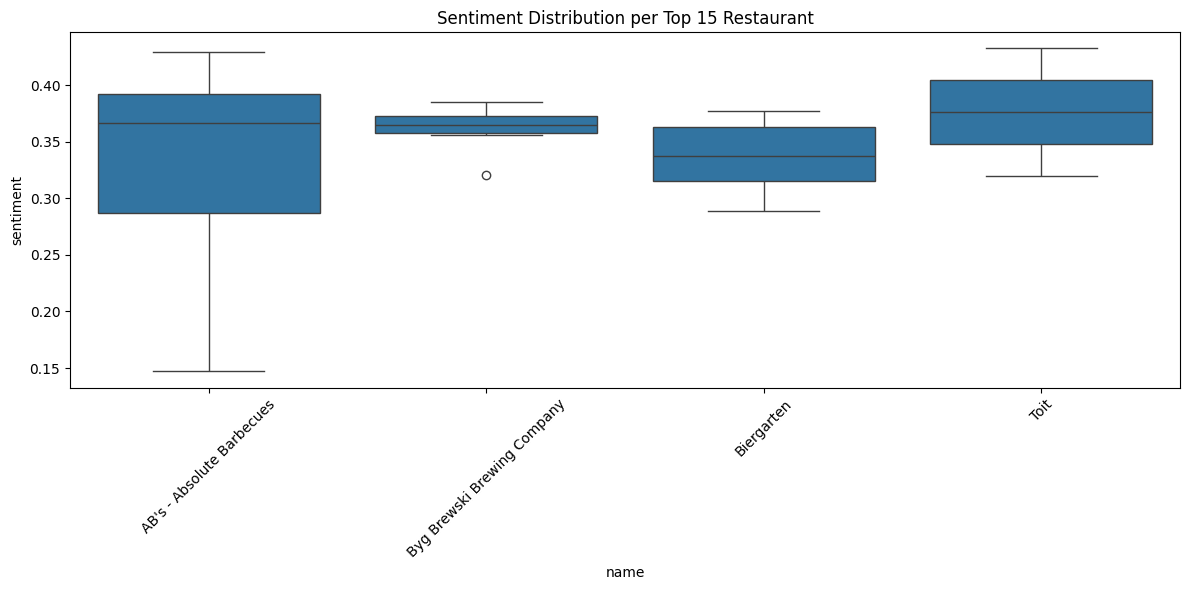

In [ ]:
import pandas as pd

# Load and clean data
df = pd.read_csv('/content/drive/MyDrive/zomato.csv', encoding='latin1',low_memory=False)

# Convert cost column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'] \
    .astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)

# Clean rating column
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

import numpy as np

df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df = df.dropna(subset=['rate', 'votes', 'approx_cost(for two people)'])

df['score'] = df['rate'] * np.log1p(df['votes']) * np.log1p(df['approx_cost(for two people)'])

top15 = df.sort_values(by='score', ascending=False).head(15)
top15_display = top15[['name', 'location', 'rate', 'votes', 'approx_cost(for two people)', 'cuisines', 'score']]
print(top15_display)

from textblob import TextBlob


df['reviews_list'] = df['reviews_list'].astype(str)


def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # -1 ~ +1


top15_reviews = df[df['name'].isin(top15['name'])].copy()
top15_reviews['sentiment'] = top15_reviews['reviews_list'].apply(get_sentiment)


sentiment_summary = top15_reviews.groupby('name')['sentiment'].mean().sort_values(ascending=False)
print(sentiment_summary)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=top15_reviews, x='name', y='sentiment')
plt.xticks(rotation=45)
plt.title('Sentiment Distribution per Top 15 Restaurant')
plt.tight_layout()
plt.show()

<ipython-input-7-2337804077>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = df['rate'] * np.log1p(df['votes']) * np.log1p(df['approx_cost(for two people)'])


                              name       location  rate    votes  \
53249  Byg Brewski Brewing Company  Sarjapur Road   4.9  16832.0   
53738  Byg Brewski Brewing Company  Sarjapur Road   4.9  16832.0   
54203  Byg Brewski Brewing Company  Sarjapur Road   4.9  16832.0   
5156   Byg Brewski Brewing Company  Sarjapur Road   4.9  16345.0   
5000   Byg Brewski Brewing Company  Sarjapur Road   4.9  16345.0   
4074   Byg Brewski Brewing Company  Sarjapur Road   4.9  16345.0   
44735    AB's - Absolute Barbecues   Marathahalli   4.8  12121.0   
43644    AB's - Absolute Barbecues   Marathahalli   4.8  12121.0   
20526                         Toit    Indiranagar   4.7  14956.0   
19854                         Toit    Indiranagar   4.7  14956.0   
55248                   Biergarten     Whitefield   4.7   7064.0   
55897                   Biergarten     Whitefield   4.7   7064.0   
55943                   Biergarten     Whitefield   4.7   7064.0   
8740                    Biergarten     Whitefiel

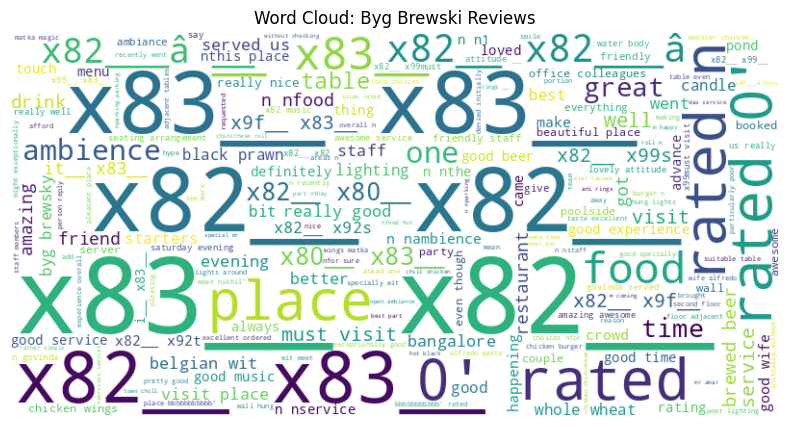

In [ ]:

import pandas as pd
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load and clean data
df = pd.read_csv('/content/drive/MyDrive/zomato.csv', encoding='latin1',low_memory=False)

# Convert cost column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'] \
    .astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)

# Clean rating column
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

import numpy as np

df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df = df.dropna(subset=['rate', 'votes', 'approx_cost(for two people)'])

df['score'] = df['rate'] * np.log1p(df['votes']) * np.log1p(df['approx_cost(for two people)'])

top15 = df.sort_values(by='score', ascending=False).head(15)
top15_display = top15[['name', 'location', 'rate', 'votes', 'approx_cost(for two people)', 'cuisines', 'score']]
print(top15_display)

from textblob import TextBlob


df['reviews_list'] = df['reviews_list'].astype(str)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Byg Brewski
bygrev = df[df['name'] == 'Byg Brewski Brewing Company']['reviews_list'].dropna()

#
text = ' '.join(bygrev).lower()

#
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Byg Brewski Reviews')
plt.show()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


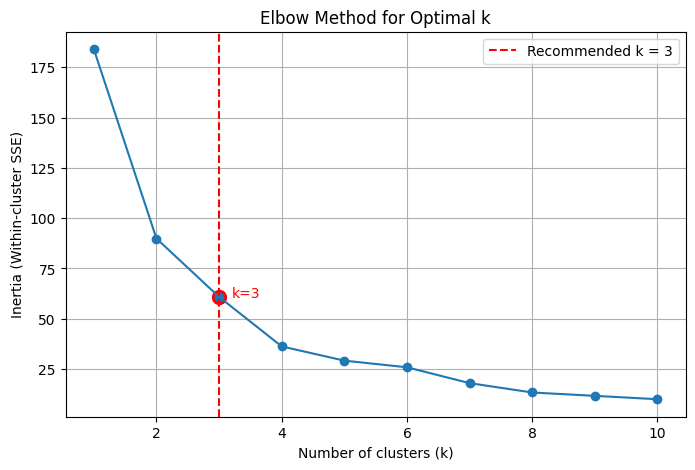

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


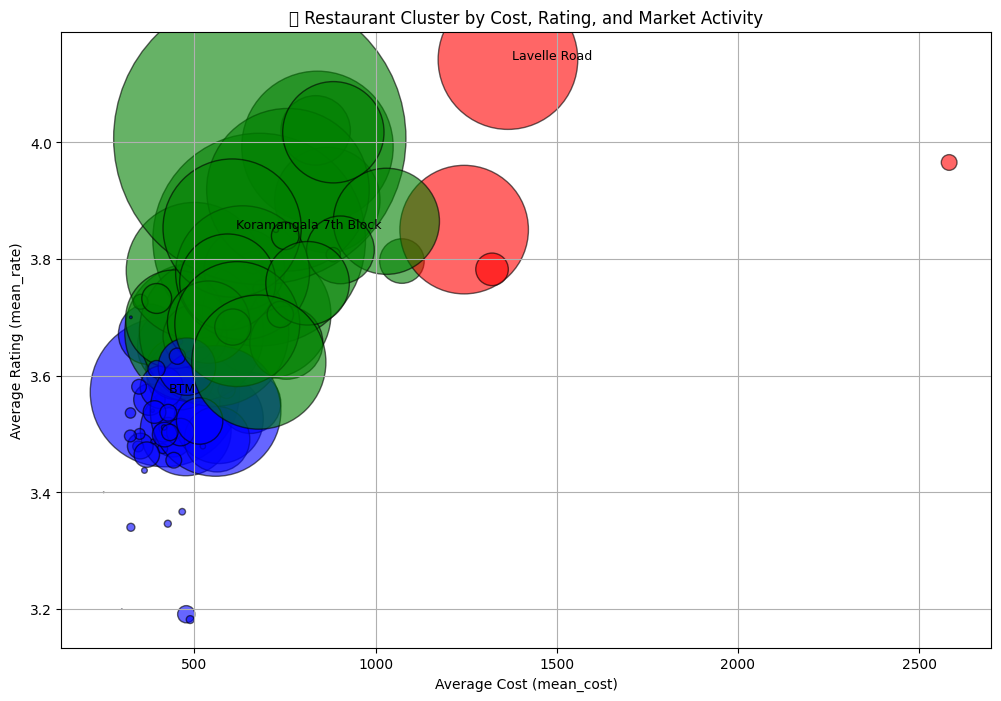

In [ ]:

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/zomato.csv', encoding='latin1', low_memory=False)


df['approx_cost(for two people)'] = df['approx_cost(for two people)'] \
    .astype(str).str.replace(',', '').str.extract('(\d+)')[0].astype(float)

df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)')[0]
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')


df = df.dropna(subset=['approx_cost(for two people)', 'rate', 'votes'])


grouped = df.groupby('location').agg({
    'approx_cost(for two people)': 'mean',
    'rate': 'mean',
    'votes': 'sum'
}).reset_index().rename(columns={
    'approx_cost(for two people)': 'mean_cost',
    'rate': 'mean_rate',
    'votes': 'total_votes'
})


grouped = grouped.dropna(subset=['mean_cost', 'mean_rate', 'total_votes'])


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(grouped[['mean_cost', 'mean_rate']])

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.axvline(x=3, color='red', linestyle='--', label='Recommended k = 3')
plt.scatter(3, inertia[2], color='red', s=100)
plt.text(3.2, inertia[2], "k=3", color='red')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.legend()
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0)
grouped['cluster'] = kmeans.fit_predict(X_scaled)


colors = ['red', 'blue', 'green']
grouped['color'] = grouped['cluster'].apply(lambda x: colors[x])


plt.figure(figsize=(12, 8))
plt.scatter(
    grouped['mean_cost'],
    grouped['mean_rate'],
    s=grouped['total_votes'] / 50,
    c=grouped['color'],
    alpha=0.6,
    edgecolor='black'
)

for i, row in grouped.iterrows():
    if row['location'] in ['Koramangala 7th Block', 'BTM', 'Lavelle Road']:
        plt.text(row['mean_cost'] + 10, row['mean_rate'], row['location'], fontsize=9)

plt.title('📍 Restaurant Cluster by Cost, Rating, and Market Activity')
plt.xlabel('Average Cost (mean_cost)')
plt.ylabel('Average Rating (mean_rate)')
plt.grid(True)
plt.show()